# **Heart disease prediction using Logistic Regression svm knn Naive bayes Algorithm**
#### Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

### Importing our dataset

In [4]:
heart_data = pd.read_csv("DATASETS/heart.csv")

### Dataset shape 918 rows x 12 columns

In [5]:
heart_data.shape

(918, 12)

## Five Rows of dataframe

In [6]:
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Checking for Null values 

In [7]:
heart_data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# **EXPLORING THE DATASET**

In [9]:
heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


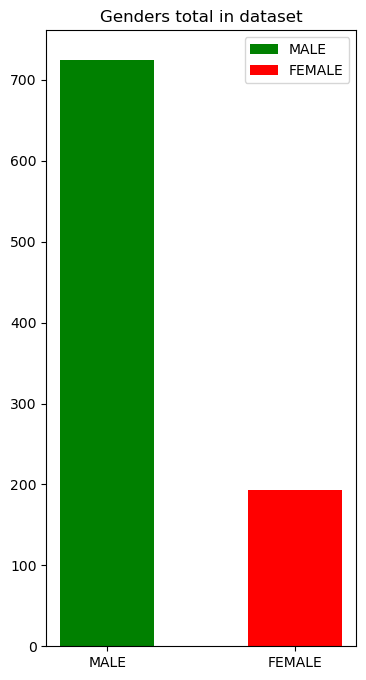

In [10]:
menheart = heart_data[(heart_data.Sex == "M")]
womanheart = heart_data[(heart_data.Sex == "F")]
mensum = len(menheart)
womansum = len(womanheart)
plt.figure(figsize=(4,8))
plt.bar(['MALE'],[mensum],color='g',label='MALE',width=0.5)
plt.bar(['FEMALE'],[womansum],color='r',label='FEMALE',width=0.5)
plt.title("Genders total in dataset")
plt.legend()
plt.show()

Text(0.5, 1.0, 'agewise heart disease')

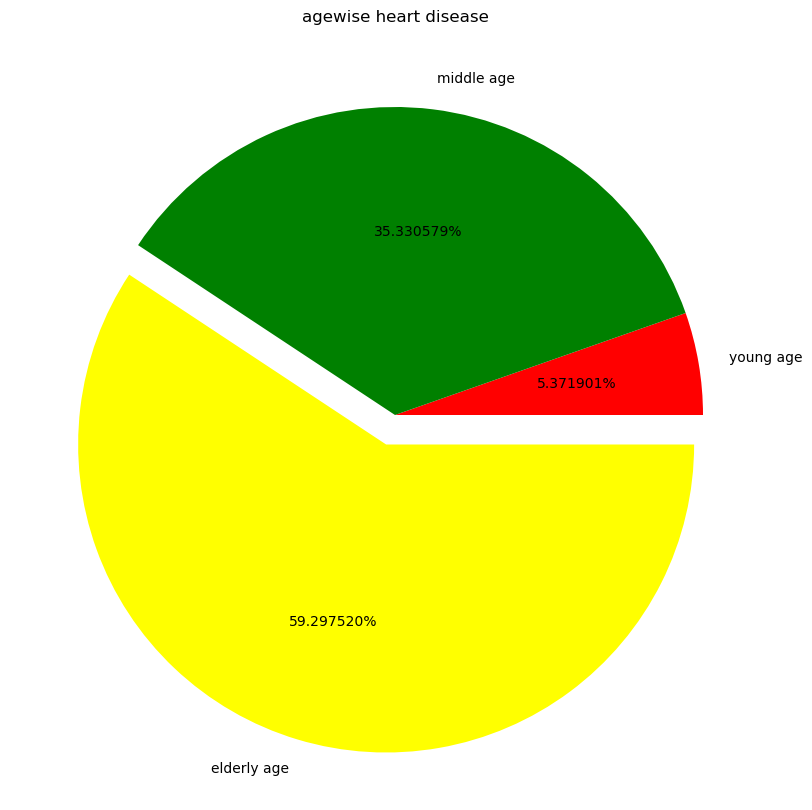

In [11]:
affected=heart_data[(heart_data['HeartDisease']==1)]

young=affected[(affected.Age>=29)&(affected.Age<40)]
middle=affected[(affected.Age>=40)&(affected.Age<55)]
elder=affected[(affected.Age>55)]

colors=['red','green','yellow']
plt.figure(figsize=(10,8))
plt.pie([len(young),len(middle),len(elder)],labels=['young age','middle age','elderly age'],explode=[0,0,0.1],colors=colors,autopct='%1f%%')
plt.tight_layout()
plt.title('agewise heart disease')

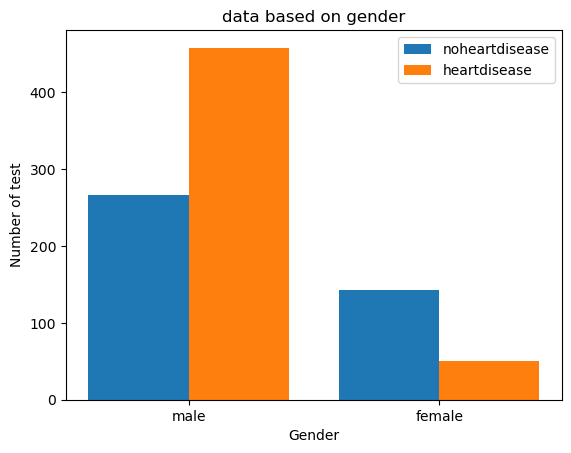

In [12]:
df=heart_data[['Sex','HeartDisease']].copy()
# Counting the number of males and females who are healthy
male_healthy = df[(df['Sex'] == 'M') & (df['HeartDisease'] == 0)].shape[0]
female_healthy = df[(df['Sex'] == 'F') & (df['HeartDisease'] == 0)].shape[0]

# Counting the number of males and females who are unhealthy
male_unhealthy = df[(df['Sex'] == 'M') & (df['HeartDisease'] == 1)].shape[0]
female_unhealthy = df[(df['Sex'] == 'F') & (df['HeartDisease'] == 1)].shape[0]

X1=['male','female']
noheartdisease=[male_healthy,female_healthy]
heartdisease=[male_unhealthy,female_unhealthy]

X_axis = np.arange(len(X1))

plt.bar(X_axis - 0.2, noheartdisease, 0.4, label = 'noheartdisease')
plt.bar(X_axis + 0.2, heartdisease, 0.4, label = 'heartdisease')

plt.xticks(X_axis, X1)
plt.xlabel("Gender")
plt.ylabel("Number of test")
plt.title("data based on gender")
plt.legend()
plt.show()

C:\Users\ARIJIT\AppData\Local\Temp\ipykernel_5416\1897965854.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(heart_data.corr(),annot=True,cmap="Reds",fmt="f",cbar=True)


<Axes: title={'center': 'Correlation Heatmap'}>

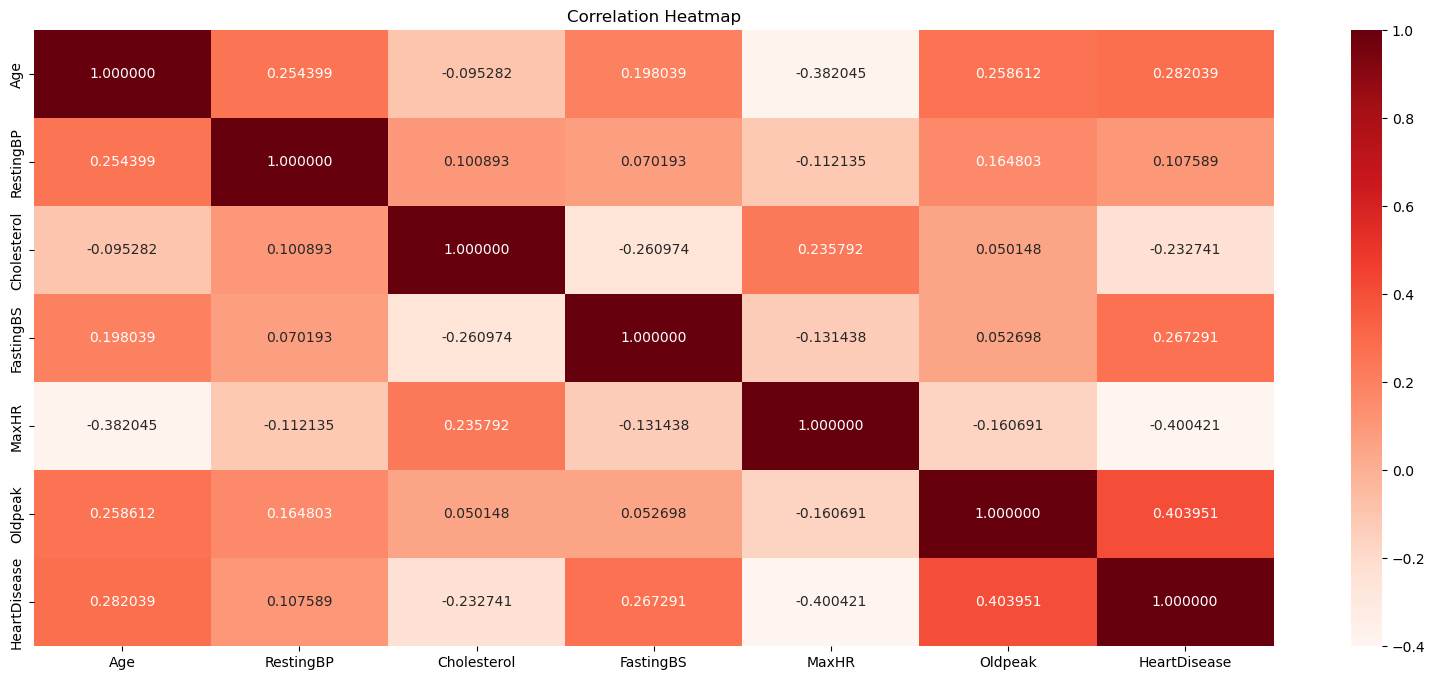

In [13]:
plt.figure(figsize=(20,8))
plt.title("Correlation Heatmap")
sns.heatmap(heart_data.corr(),annot=True,cmap="Reds",fmt="f",cbar=True)

[]

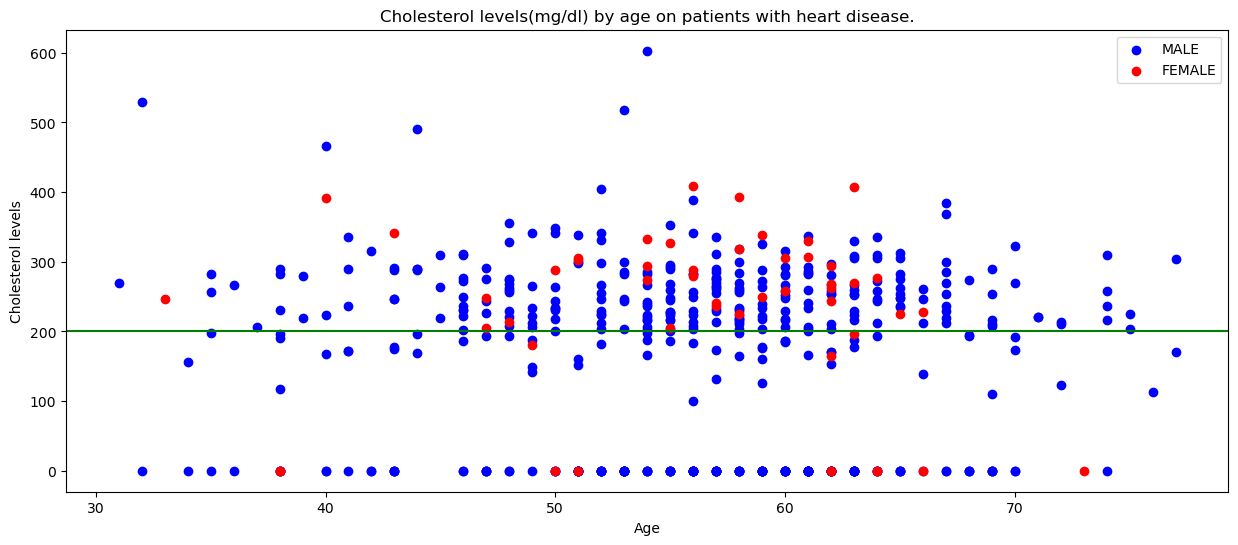

In [14]:
mantrue=heart_data[(heart_data.Sex=='M') & (heart_data.HeartDisease==1)]
womantrue=heart_data[(heart_data.Sex=='F') & (heart_data.HeartDisease==1)]
plt.rcParams["figure.figsize"] = (15,6)
plt.scatter((mantrue.Age),(mantrue.Cholesterol),color="b",label="MALE")
plt.scatter((womantrue.Age),(womantrue.Cholesterol),color="r",label="FEMALE")
plt.axhline(y=200,color="g")
plt.ylabel('Cholesterol levels')
plt.xlabel('Age')
plt.title("Cholesterol levels(mg/dl) by age on patients with heart disease.")
plt.legend()
plt.plot()

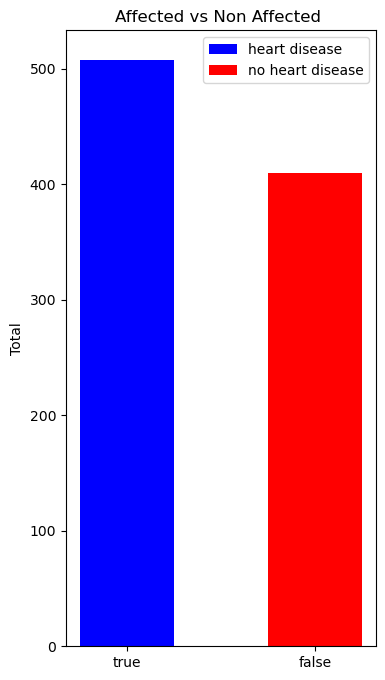

In [15]:
hearttrue = heart_data[(heart_data.HeartDisease == 1)]
heartfalse = heart_data[(heart_data.HeartDisease == 0)]
sumtrue = len(hearttrue)
sumfalse = len(heartfalse)
plt.figure(figsize=(4,8))
plt.title("Affected vs Non Affected ")
plt.bar(['true'],[sumtrue],color="blue",label="heart disease",width=0.5)
plt.bar(['false'],[sumfalse],color="red",label='no heart disease',width=0.5) 
plt.legend()
plt.ylabel('Total')
plt.show()

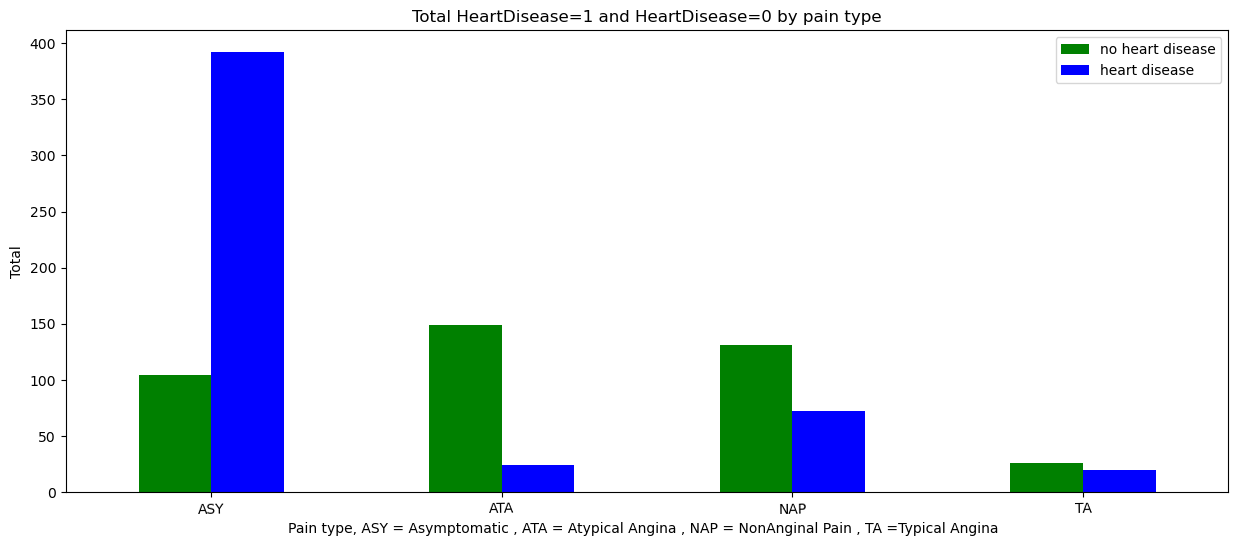

In [16]:
pd.crosstab(heart_data.ChestPainType,heart_data.HeartDisease).plot(kind="bar",figsize=(15,6),color=['g','b'],)
plt.title('Total HeartDisease=1 and HeartDisease=0 by pain type')
plt.xlabel('Pain type, ASY = Asymptomatic , ATA = Atypical Angina , NAP = NonAnginal Pain , TA =Typical Angina  ')
plt.ylabel('Total')
plt.legend(("no heart disease","heart disease"))
plt.xticks(rotation=1 )
plt.show()

In [17]:
heart_data_X = heart_data.iloc[:,:-1].values
heart_data_Y = heart_data.iloc[:,-1].values

## **Preprocessing**

### Label Encoding

In [18]:
en = LabelEncoder()
heart_data_X[:,1] = en.fit_transform(heart_data_X[:,1])
heart_data_X[:,2] = en.fit_transform(heart_data_X[:,2])
heart_data_X[:,6] = en.fit_transform(heart_data_X[:,6])
heart_data_X[:,8] = en.fit_transform(heart_data_X[:,8])
heart_data_X[:,10] = en.fit_transform(heart_data_X[:,10])

### Train data and test data selection

In [19]:
heart_train_X,heart_test_X,heart_train_Y, heart_test_Y = train_test_split(heart_data_X,heart_data_Y,test_size=0.25,random_state=42)

### Feature scaling

In [20]:
st_heart_x = StandardScaler()    
heart_train_X = st_heart_x.fit_transform(heart_train_X)    
heart_test_X = st_heart_x.transform(heart_test_X)  

# **Machine Learning** 

## Logistic Regression

In [21]:
classifier = LogisticRegression(random_state=0)  
classifier.fit(heart_train_X,heart_train_Y) 

LogisticRegression(random_state=0)

In [22]:
y_heart_pred = classifier.predict(heart_test_X)

### Making a Logistic Regression Confussion Matrix

<Axes: title={'center': 'Logistic Regression Confusion matrix'}>

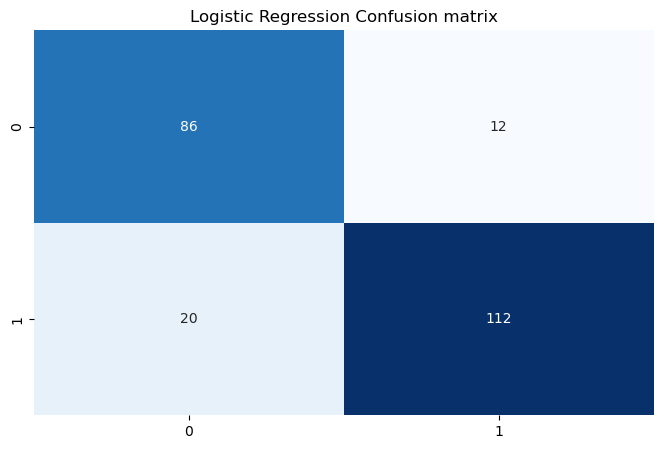

In [23]:
plt.figure(figsize=(8,5))
conf_mat_re = confusion_matrix(heart_test_Y,y_heart_pred)
plt.title("Logistic Regression Confusion matrix")
sns.heatmap(conf_mat_re,annot=True,cmap="Blues",fmt="d",cbar=False)

## knn(K-nearest-neighbors)

In [24]:
kn=KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=2 )  
kn.fit(heart_train_X, heart_train_Y)

KNeighborsClassifier(n_neighbors=7)

In [25]:
Y_predict_KN=kn.predict(heart_test_X)

## Confussion Matrix Using  k = 7

<Axes: title={'center': 'K-Nearest Neighbour Algorithm Confussion Matrix'}>

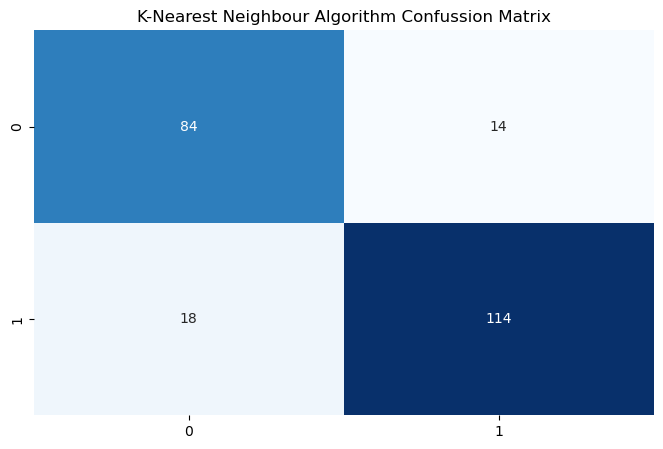

In [26]:
plt.figure(figsize=(8,5))
conf_mat_kn = confusion_matrix(heart_test_Y,Y_predict_KN)
plt.title("K-Nearest Neighbour Algorithm Confussion Matrix")
sns.heatmap(conf_mat_kn,annot=True,cmap="Blues",fmt="d",cbar=False)

## svm(support vector machine)

In [27]:
classifier_SVC = SVC(kernel='rbf', random_state=0)
classifier_SVC.fit(heart_train_X,heart_train_Y)

SVC(random_state=0)

In [28]:
Y_predict_SVC=classifier_SVC.predict(heart_test_X)
sc = classifier_SVC.score(heart_test_X,heart_test_Y)

## Confusion matrix using SVC

<Axes: title={'center': 'SVC confusion matrix'}>

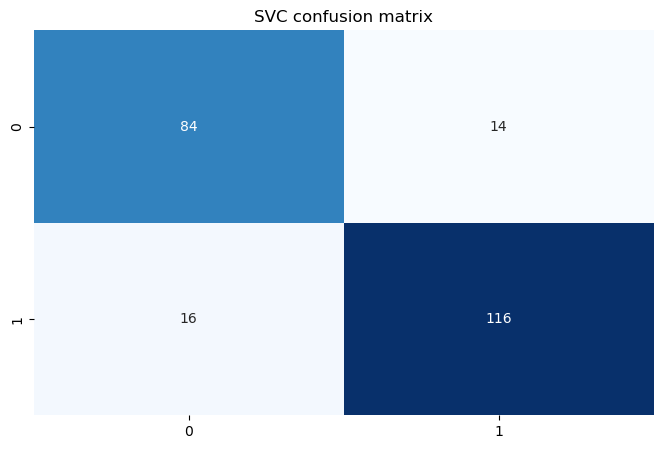

In [29]:
plt.figure(figsize=(8,5))
conf_mat = confusion_matrix(heart_test_Y,Y_predict_SVC)
plt.title("SVC confusion matrix")
sns.heatmap(conf_mat,annot=True,cmap="Blues",fmt="d",cbar=False)

## Naive Bays

In [30]:
classifier_G = GaussianNB()  
classifier_G.fit(heart_train_X,heart_train_Y)

GaussianNB()

In [31]:
Y_predict_G=classifier_G.predict(heart_test_X)

## Confussion Matrix using Naive Bays

<Axes: title={'center': 'Naive Bays confusion Matrix(Gaussian)'}>

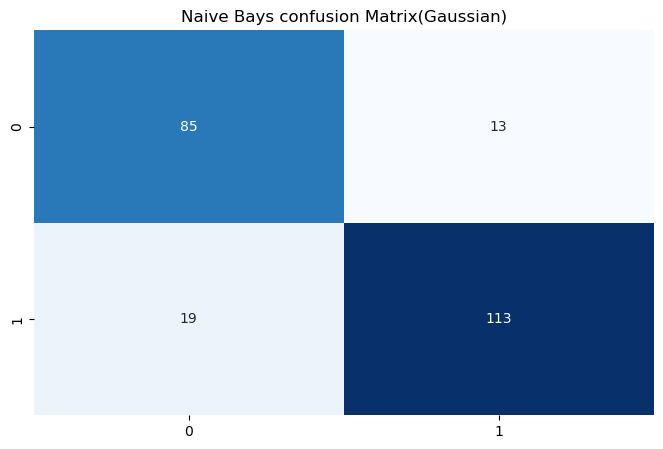

In [32]:
plt.figure(figsize=(8,5))
conf_mat = confusion_matrix(heart_test_Y,Y_predict_G)
plt.title("Naive Bays confusion Matrix(Gaussian)")
sns.heatmap(conf_mat,annot=True,cmap="Blues",fmt="d",cbar=False)

# **COMPAREING MODEL**

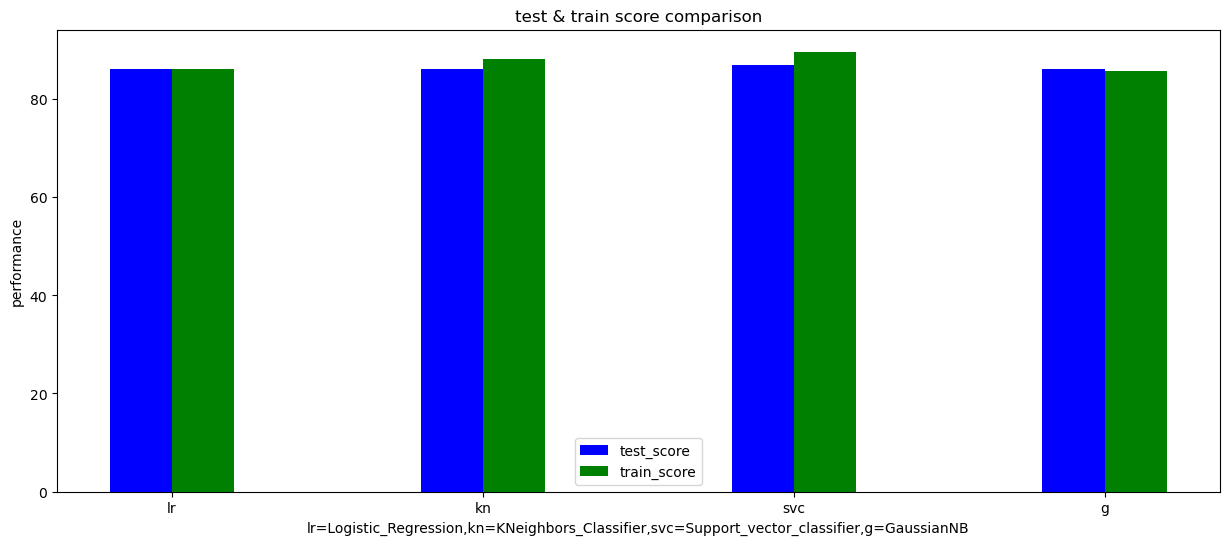

In [33]:
test_lr=classifier.score(heart_test_X,heart_test_Y)*100
train_lr=classifier.score(heart_train_X,heart_train_Y)*100

test_kn=kn.score(heart_test_X,heart_test_Y)*100
train_kn=kn.score(heart_train_X,heart_train_Y)*100

test_svc=classifier_SVC.score(heart_test_X,heart_test_Y)*100
train_svc=classifier_SVC.score(heart_train_X,heart_train_Y)*100

test_g=classifier_G.score(heart_test_X,heart_test_Y)*100
train_g=classifier_G.score(heart_train_X,heart_train_Y)*100


X1=['lr','kn','svc','g']
test=[test_lr,test_kn,test_svc,test_g]
train=[train_lr,train_kn,train_svc,train_g]
X_axis = np.arange(len(X1))

plt.bar(X_axis - 0.1, test, 0.2, label = 'test_score',color='b')
plt.bar(X_axis + 0.1, train, 0.2, label = 'train_score',color='g')

plt.xticks(X_axis, X1)
plt.xlabel('lr=Logistic_Regression,kn=KNeighbors_Classifier,svc=Support_vector_classifier,g=GaussianNB')
plt.ylabel("performance")
plt.title("test & train score comparison")
plt.legend()
plt.show()